# Modelo que prevê o divórcio de um casal com base nas respostas desse casal a um questionário psicológico

## Afirmações feitas aos casais estudados:

1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.

## Passos
#### 1 - Carregar as bibliotecas
#### 2 - Carregar a base de dados
#### 3 - Tratar os dados
#### 4 - Construção dos alvos
#### 5 - Construção das variáveis
#### 6 - Treinamento do modelo sem otimização
#### 7 - Avaliação dos resultados do modelo sem otimização
#### 8 - Otimização do modelo
#### 9 - Avaliação dos resultados após otimização do modelo
#### 10 - Cross Validation e análise de robustez
#### 11 - Persistência do modelo treinado e validado

## 1 - Importação das bibliotecas necessárias

In [289]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Para remover os warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## 2 - Carga da base de dados

In [290]:
data = pd.read_csv('divorce_data.csv',sep=';')
data.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## 3 - Tratamento e análise dos dados

In [291]:
data.isna().sum()

Atr1     0
Atr2     0
Atr3     0
Atr4     0
Atr5     0
Atr6     0
Atr7     0
Atr8     0
Atr9     0
Atr10    0
Atr11    0
Atr12    0
Atr13    0
Atr14    0
Atr15    0
Atr16    0
Atr17    0
Atr18    0
Atr19    0
Atr20    0
Atr21    0
Atr22    0
Atr23    0
Atr24    0
Atr25    0
Atr26    0
Atr27    0
Atr28    0
Atr29    0
Atr30    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
Atr39    0
Atr40    0
Atr41    0
Atr42    0
Atr43    0
Atr44    0
Atr45    0
Atr46    0
Atr47    0
Atr48    0
Atr49    0
Atr50    0
Atr51    0
Atr52    0
Atr53    0
Atr54    0
Class    0
dtype: int64

In [292]:
#Existem duas classes: 0 para não divórcio e 1 para divórcio
data.groupby('Class').count()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
Class,,,,,,,,,,,,,,,,,,,,,
0,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
1,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84


In [293]:
#Ao que parece, os casais deram notas de 0 a 4 em cada uma das afirmações feitas pelos pesquisadores
for i in range(data.shape[1] - 1):
    print(f'COLUNA Atr{i+1}\n',data[f'Atr{i+1}'].describe()[['min','max']],'\n')

COLUNA Atr1
 min    0.0
max    4.0
Name: Atr1, dtype: float64 

COLUNA Atr2
 min    0.0
max    4.0
Name: Atr2, dtype: float64 

COLUNA Atr3
 min    0.0
max    4.0
Name: Atr3, dtype: float64 

COLUNA Atr4
 min    0.0
max    4.0
Name: Atr4, dtype: float64 

COLUNA Atr5
 min    0.0
max    4.0
Name: Atr5, dtype: float64 

COLUNA Atr6
 min    0.0
max    4.0
Name: Atr6, dtype: float64 

COLUNA Atr7
 min    0.0
max    4.0
Name: Atr7, dtype: float64 

COLUNA Atr8
 min    0.0
max    4.0
Name: Atr8, dtype: float64 

COLUNA Atr9
 min    0.0
max    4.0
Name: Atr9, dtype: float64 

COLUNA Atr10
 min    0.0
max    4.0
Name: Atr10, dtype: float64 

COLUNA Atr11
 min    0.0
max    4.0
Name: Atr11, dtype: float64 

COLUNA Atr12
 min    0.0
max    4.0
Name: Atr12, dtype: float64 

COLUNA Atr13
 min    0.0
max    4.0
Name: Atr13, dtype: float64 

COLUNA Atr14
 min    0.0
max    4.0
Name: Atr14, dtype: float64 

COLUNA Atr15
 min    0.0
max    4.0
Name: Atr15, dtype: float64 

COLUNA Atr16
 min    0.0
max

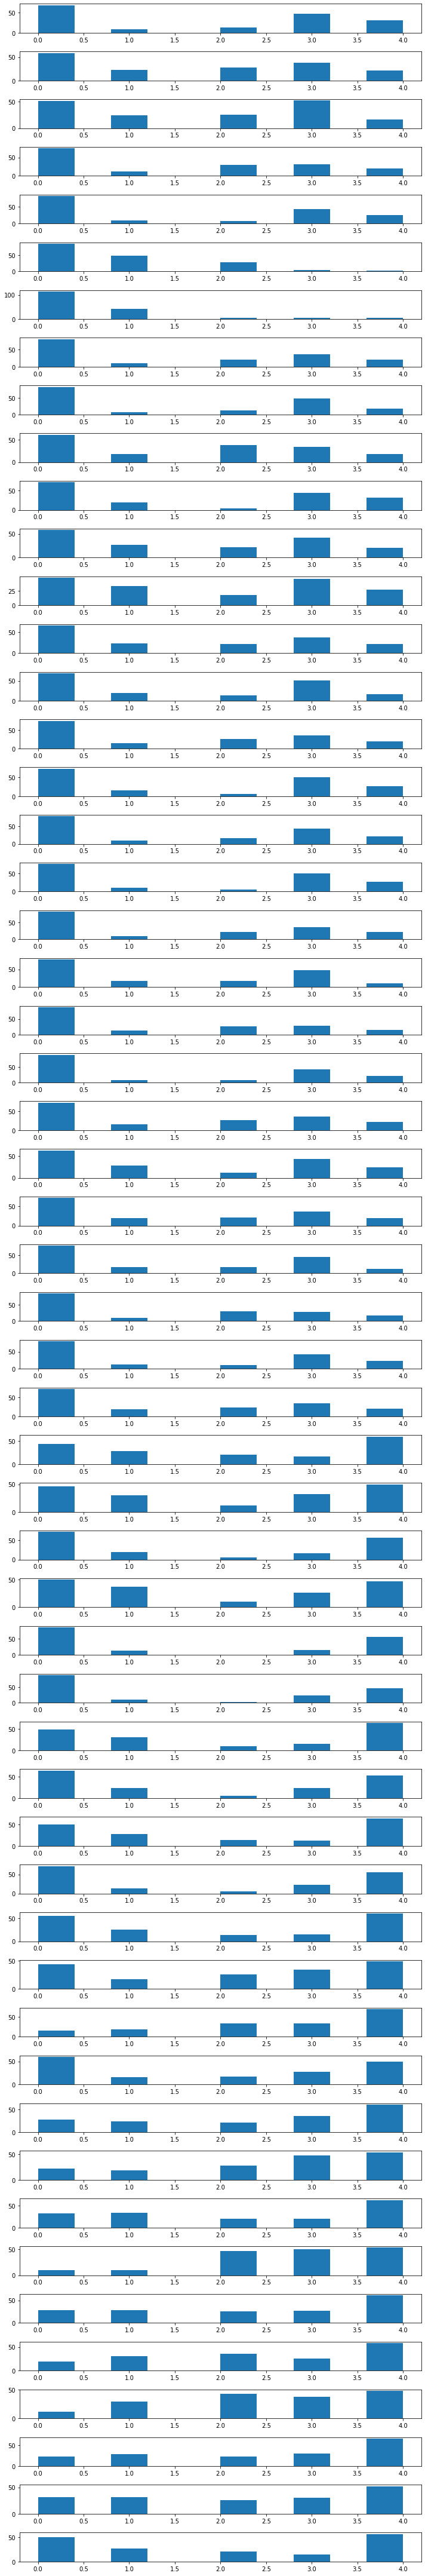

In [294]:
#Vejo a distribuição de cada resposta
fig , subplots = plt.subplots(data.shape[1] - 1 , figsize=(10,60))
for i in range(data.shape[1] - 1):
    subplots[i].hist(data[f'Atr{i+1}']);

fig.tight_layout();

## Passos 4 e 5 posso pular (Dados já vieram com variáveis e alvo prontos)

## 6 - Treinamento do Modelo sem otimização

In [295]:
x = data.drop(columns=['Class'])
y = data['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,random_state=42)

print(f"x_train:{x_train.shape}\nx_test:{x_test.shape}\ny_train:{y_train.shape}\ny_test:{y_test.shape}\n")

x_train:(85, 54)
x_test:(85, 54)
y_train:(85,)
y_test:(85,)



In [296]:
rf_model1 = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=10,max_features='auto',min_samples_leaf=1,
                                   min_samples_split=2,n_estimators=10,n_jobs=5,oob_score=True,random_state=42)
#linha que treina o modelo
rf_model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [297]:
y_pred_test = rf_model1.predict(x_test)

In [298]:
y_pred_test

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)

## 7 - Avaliação dos resultados do modelo sem otimização

In [299]:
print(confusion_matrix(y_test,y_pred_test))
print('-' * 30)
print(classification_report(y_test,y_pred_test))

[[39  0]
 [ 3 43]]
------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.93      0.97        46

    accuracy                           0.96        85
   macro avg       0.96      0.97      0.96        85
weighted avg       0.97      0.96      0.96        85



In [300]:
print("Acurácia:",round(metrics.accuracy_score(y_test,y_pred_test) * 100 , 2) , '%')

Acurácia: 96.47 %


## Passos 8 e 9 não foram necessários visto que as métricas do modelo foram bastante altas

## 10 - Cross Validation e Análise de Robustez

### Cross Validation

In [301]:
base_cv = data.drop(columns=['Class']).copy()
alvo_cv = data['Class'].copy()

In [302]:
#K Fold Cross Validation
K = 10

cv = KFold(n_splits=K,shuffle=True)


accuracy_cv = []

#Executando o Cross Validation
for train_index, test_index in cv.split(base_cv):
    #print(train_index,test_index)
    
    #Split Train Test
    x_train_cv , y_train_cv = base_cv.iloc[train_index] , alvo_cv.iloc[train_index]
    x_test_cv , y_test_cv = base_cv.iloc[test_index] , alvo_cv.iloc[test_index]
    
    #Train the Model
    rf_cv = rf_model1.fit(x_train_cv,y_train_cv)
    
    #Make predictions with rf_cv model
    y_pred_test_cv = rf_cv.predict(x_test_cv)
    
    #append accuracy to accuracy_cv list
    accuracy_cv.append( round( metrics.accuracy_score( y_test_cv , y_pred_test_cv ) * 100 , 2 ) )
    
    

### Análise de Robustez

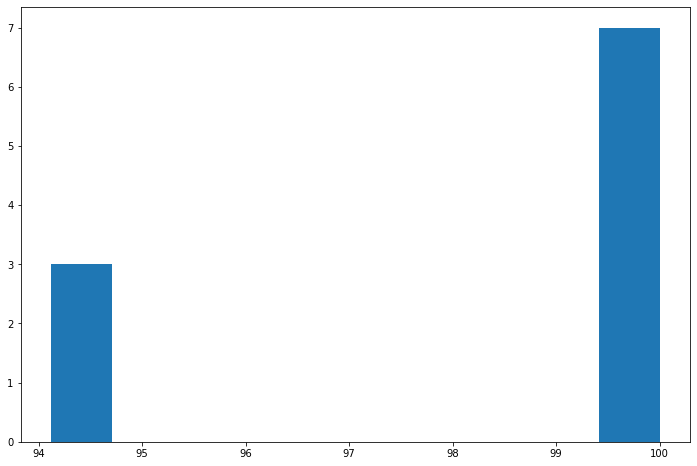

In [303]:
plt.figure(figsize=(12,8))
plt.xlabel = 'Accuracy'
plt.ylabel = 'qtd modelos'
plt.title = 'Análise de Robustez Random Forest Classifier'
plt.hist(accuracy_cv);
plt.savefig('a.png')


In [304]:
accuracy_cv = pd.DataFrame(accuracy_cv)
accuracy_cv.describe()

,0
count,10.00000
mean,98.23600
std,2.84031
min,94.12000
25%,95.59000
50%,100.00000
75%,100.00000
max,100.00000


#### A análise de robustez do modelo mostra que ele performa muito bem nos mais diversos cenários possíveis de dados.
#### A relação std/mean das acurácias obtidas é também inferior a 10% outro indicativo de robustez do modelo.

## 11 - Salvando / Carregando modelo com o pickle

### Salvando modelo

In [305]:
import pickle

filename = 'rf_model1.sav'
pickle.dump(rf_model1,open(filename,'wb'))

### Carregando modelo salvo e reutilizando o mesmo

In [306]:
modelo = pickle.load(open(filename,'rb'))

x_input = [data.iloc[0].values[:54]]

y_output = modelo.predict(x_input)

print(f"Input: {x_input}\n\nOutput: {y_output}")

Input: [array([2, 2, 4, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 3, 3, 2, 1, 1, 2,
       3, 2, 1, 3, 3, 3, 2, 3, 2, 1], dtype=int64)]

Output: [0]
